# __Tutorial on using the Gaia archive to access data on open clusters and estimating their ages from evolution tracks (with answers)__

## _Author: Orlagh Creevey_

## _This Hands-on has been adapted from a Master Hands-on course prepared by Orlagh Creevey and Mathias Schultheis_

## _Some of the material from this notebook has been copied from a notebook prepared by Anthony Brown_

## __Before you start (if not already done)__
It is useful for you to be registered as a user of the Gaia archive.  It is not mandatory for this exercise, but if you plan on requesting data from the Gaia archive regularly this is a good idea. The registration is easy and quick (and free) and offers the following facilities:

* 20 GB of space to store query results
* the option to create and share your own tables ('user tables'),
* longer timeout for large or complex query jobs.

You can register [here](https://www.cosmos.esa.int/web/gaia-users/register).

## First install required Python packages

We need the `astroquery` package to access the tools for programmatic access to the Gaia archive. For more information and examples see:
* [astroquery documentation](https://astroquery.readthedocs.io/en/latest/gaia/gaia.html)
* [Gaia archive python tutorial](https://www.cosmos.esa.int/web/gaia-users/archive/use-cases#ClusterAnalysisPythonTutorial)


In [ ]:
!pip install astroquery   # to use the gaia archive
!pip install git+https://github.com/dinilbose/ezbasti   #to download basti isochrones automatically (information later)
!pip install --upgrade pandas
!pip install --upgrade matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 59.9 MB/s eta 0:00:00
  Cloning https://github.com/dinilbose/ezbasti to /tmp/pip-req-build-z52j2blx
  Running command git clone --filter=blob:none --quiet https://github.com/dinilbose/ezbasti /tmp/pip-req-build-z52j2blx
  Resolved https://github.com/dinilbose/ezbasti to commit a476d86fa4ba527fcbb830e8902b7d347b0e37c7
  Preparing metadata (setup.py) ... done
  Created wheel for ezbasti: filename=ezbasti-0.1-py3-none-any.whl size=5978 sha256=f305fc2976f25d1e7e15ebf662413ed9d3ae3be6bb10ead3aed895565a40634a
  Stored in directory: /tmp/pip-ephem-wheel-cache-55qjfx4z/wheels/29/43/b9/f060fb4a1dcf33cf507e0f6f039eedd3879d52923e5bedeb9a
Successfully built ezbasti
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 33.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Fou

## Python imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

from astroquery.gaia import Gaia
from astropy.table import Table

from itertools import chain

## Matplotlib settings

In [ ]:
linewidths = 2
axislinewidths = 2
lenticks = 6

#rc('font', family='sans-serif', size=18)
rc('xtick.major', size=lenticks)
rc('xtick.minor', size=lenticks * 2 / 3)
rc('ytick.major', size=lenticks)
rc('ytick.minor', size=lenticks * 2 / 3)
rc('lines', linewidth=linewidths)
rc('axes', linewidth=axislinewidths)

## __Login to the Gaia archive first__   (not necessary)

For this exercise you must be logged in to the Gaia archive. The form in the next code cell asks for you archive user name. This is also needed further down.

*Your might be automatically logged out after a while. Just re-run this cell to login again.*

In [ ]:
#@title Provide your Gaia archive user name
#username = 'ocreevey' #@param {type:"string"}

#Gaia.login(user = username)


### Cleaning up to avoid archive errors

*You can skip this step if you have yet not logged in*

If you plan up uploading your tables to the archive, then you need to ensure that you do not have user tables with the same names as the ones you will be using here.  So you should delete them by doing the following query where 'bla' is the name of your user table `user_yourname.bla`

`Gaia.delete_user_table('bla')`



In [ ]:
#Gaia.delete_user_table('bla')

You can also delete the tables through the Gaia archive [web interface](https://gea.esac.esa.int/archive/) (after signing in). To delete a table in the archive, look the table up in your "User Tables" section in the menu to the left of the screen (see image below) and then check the table(s) to delete and click on the "delete" icon
(highlighted in the image).

<img src="https://catcopy.ipac.caltech.edu/ssw/hands-on/Gaia_login.png"></img>

## Find Gaia DR3 tables in the Gaia archive
We start by generating an overview of the Gaia DR3 tables available from the [ESA Gaia archive](https://gea.esac.esa.int/archive/).

In [ ]:
tables = Gaia.load_tables(only_names=True)
for table in (tables):
    if 'gaiadr3' in table.get_qualified_name():
        print (table.get_qualified_name())

INFO:astroquery:Retrieving tables...


INFO: Retrieving tables... [astroquery.utils.tap.core]


INFO:astroquery:Parsing tables...


INFO: Parsing tables... [astroquery.utils.tap.core]


INFO:astroquery:Done.


INFO: Done. [astroquery.utils.tap.core]
gaiadr3.gaiadr3.gaia_source
gaiadr3.gaiadr3.gaia_source_lite
gaiadr3.gaiadr3.astrophysical_parameters
gaiadr3.gaiadr3.astrophysical_parameters_supp
gaiadr3.gaiadr3.oa_neuron_information
gaiadr3.gaiadr3.oa_neuron_xp_spectra
gaiadr3.gaiadr3.total_galactic_extinction_map
gaiadr3.gaiadr3.total_galactic_extinction_map_opt
gaiadr3.gaiadr3.commanded_scan_law
gaiadr3.gaiadr3.allwise_best_neighbour
gaiadr3.gaiadr3.allwise_neighbourhood
gaiadr3.gaiadr3.apassdr9_best_neighbour
gaiadr3.gaiadr3.apassdr9_join
gaiadr3.gaiadr3.apassdr9_neighbourhood
gaiadr3.gaiadr3.dr2_neighbourhood
gaiadr3.gaiadr3.gsc23_best_neighbour
gaiadr3.gaiadr3.gsc23_join
gaiadr3.gaiadr3.gsc23_neighbourhood
gaiadr3.gaiadr3.hipparcos2_best_neighbour
gaiadr3.gaiadr3.hipparcos2_neighbourhood
gaiadr3.gaiadr3.panstarrs1_best_neighbour
gaiadr3.gaiadr3.panstarrs1_join
gaiadr3.gaiadr3.panstarrs1_neighbourhood
gaiadr3.gaiadr3.ravedr5_best_neighbour
gaiadr3.gaiadr3.ravedr5_join
gaiadr3.gaiadr3.rave

## A first simple query on GaiaDR3 to produce a HR diagram

Request data for a subset of the sources in the `gaiadr3.goldsample_fgkm_stars` presented in the Golden Sample of Astrophysical Parameters and store the results in `gtable`.  We will select just the first 20 000 results in order to speed up the query.

__Note:__ There are six tables from this work that are published on the Gaia archive and are found under Performance Verification Papers.  and is found in the above list `gaiadr3.goldsample_fgkm_stars` in the Gaia archive.

Let's create a job in order to query the archive and put the results in the table `gold`.

Then print out details of the new table.


In [ ]:
job = Gaia.launch_job_async("SELECT top 20000 source_id, teff_gspphot, radius_flame, lum_flame, age_flame \
FROM  gaiadr3.gold_sample_fgkm_stars")

gold = job.get_results()

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


In [ ]:
print(gold.info)

<Table length=20000>
    name      dtype   unit                                                             description                                                            n_bad
------------ ------- ------ --------------------------------------------------------------------------------------------------------------------------------- -----
   source_id   int64                                                                       Unique source identifier (unique within a particular Data Release)     0
teff_gspphot float32      K                                                       Effective temperature from GSP-Phot Aeneas best library using BP/RP spectra     0
radius_flame float32 solRad                                                              Radius of the star derived from FLAME using teffGspphot and lumFlame     2
   lum_flame float32 solLum Luminosity of the star from FLAME using G band magnitude, extinction (agGspphot),  parallax and a bolometric correction (bcFlame)  

The next code block makes a HR diagram from the data using effective temperature and luminosity.

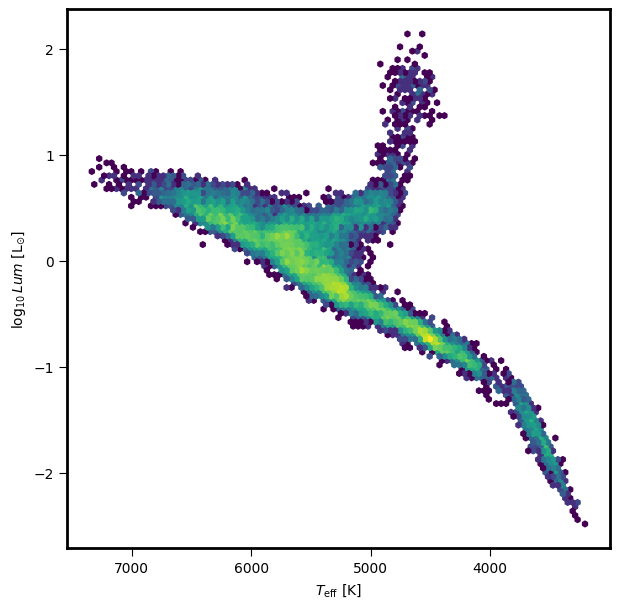

In [ ]:

teff = gold['teff_gspphot']
lum= gold['lum_flame']

fig, axcmd = plt.subplots(1, 1, figsize=(7, 7))

axcmd.hexbin(teff, np.log10(lum), bins='log', mincnt=1)
axcmd.set_xlabel(r'$T_{\rm eff}$ [K]')
axcmd.set_ylabel(r'$\log_{10} Lum$ [L$_{\odot}$]')
axcmd.invert_xaxis()


If you prefer to work in pandas, you can convert the table to a pandas data frame.   Then you can plot the figures directly from the pandas dataframe.  You should have the latest versions of pandas and matplotlib installed.

See the example below.   For the rest of the answers, I will use the above example for plots.


Text(0, 0.5, '$\\log_{10} Lum$ [L$_{\\odot}$]')

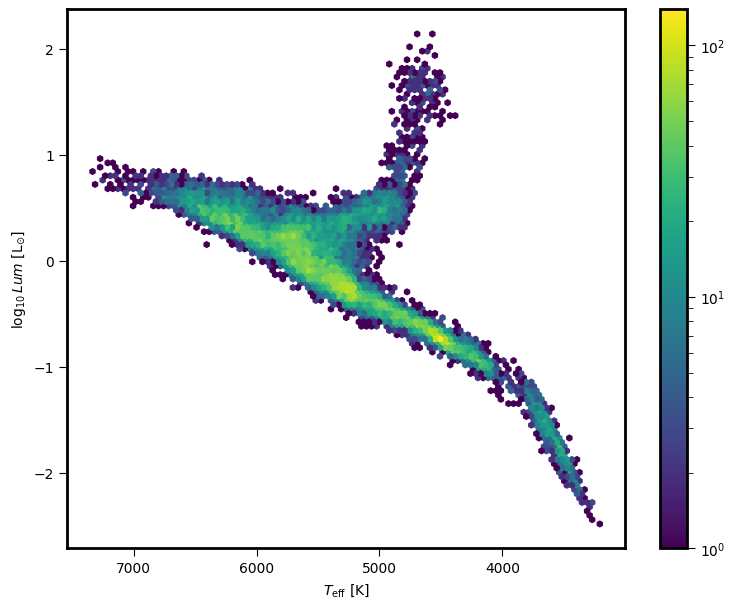

In [ ]:

goldPandas = gold.to_pandas()
goldPandas["log_lum_flame"] = np.log10(gold["lum_flame"])
ax = goldPandas.plot.hexbin(x="teff_gspphot", y="log_lum_flame", bins='log', mincnt=1, cmap="viridis", figsize=(9, 7))
ax.invert_xaxis()
ax.set_xlabel(r'$T_{\rm eff}$ [K]')
ax.set_ylabel(r'$\log_{10} Lum$ [L$_{\odot}$]')

### Exercise 1

Make a similar figure but plot bolometric magnitude on the y-axis

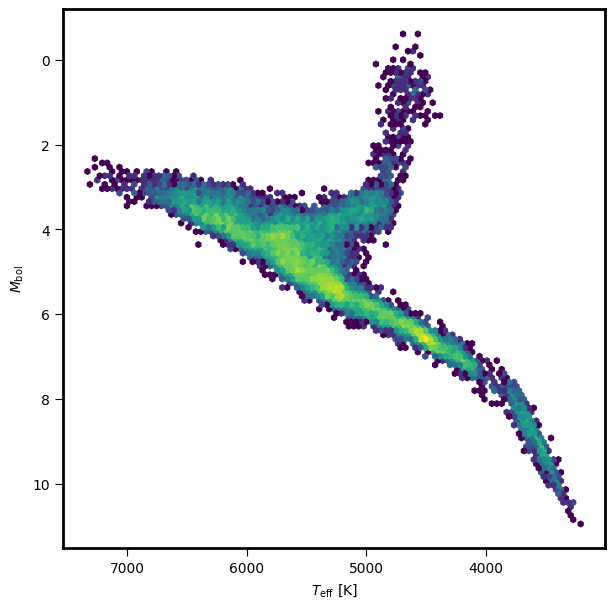

In [ ]:
# Insert your code here
#
#  answer is
#     define: bolmag = -2.5 * np.log10 (gold['lum_flame']) + 4.74
#             fig, axcmd = plt.subplots(1, 1, figsize=(7, 7))
#             axcmd.hexbin(teff, bolmag, bins='log', mincnt=1)
#             axcmd.set_xlabel(r'$T_{\rm eff}$ [K]')
#             axcmd.set_ylabel(r'$M_{\rm bol}$')
#             axcmd.invert_xaxis()
#             axcmd.invert_yaxis()
#             plt.show()

bolmag = -2.5 * np.log10 (gold['lum_flame']) + 4.74
fig, axcmd = plt.subplots(1, 1, figsize=(7, 7))
axcmd.hexbin(teff, bolmag, bins='log', mincnt=1)
axcmd.set_xlabel(r'$T_{\rm eff}$ [K]')
axcmd.set_ylabel(r'$M_{\rm bol}$')
axcmd.invert_xaxis()
axcmd.invert_yaxis()
plt.show()

## __Now we will query the Gaia archive for sources in the direction of M67 / NGC 2682__

The approximate coordinates in galactic latitude and longitude of M67 are (215.37699, + 31.37026).  One could also query in ra, dec by replacing (l,b) by (ra, dec) and using the ra, dec coordinates.
We launch a cone search around the coordinates and retrieve all sources that are within a certain distance from the center.

Once we recover the results, we will stock them in a file called m67_cone.   Then we will print the information related to the data that we recovered.


In [ ]:
job = Gaia.launch_job_async("SELECT *, DISTANCE(215.3769982238633, +31.37026, l, b) AS ang_sep \
FROM gaiadr3.gaia_source \
WHERE DISTANCE(215.3769982238633, +31.37026, l, b) < 0.5 \
AND phot_g_mean_mag < 18 \
AND parallax IS NOT NULL")

m67_cone = job.get_results()

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


In [ ]:
print(m67_cone.info)

<Table length=1476>
              name               dtype       unit                                                                  description                                                              n_bad
------------------------------- ------- ------------- ------------------------------------------------------------------------------------------------------------------------------------- -----
                    solution_id   int64                                                                                                                                 Solution Identifier     0
                    DESIGNATION  object                                                                                         Unique source designation (unique across all Data Releases)     0
                      source_id   int64                                                                                  Unique source identifier (unique within a particular Data Release)     0
          

### __Exercise 2__
Plot a colour magnitude diagram (CMD) of the data set (G mag versus Bp-Rp).

Do you see any trends, does it look like a CMD?  Why?


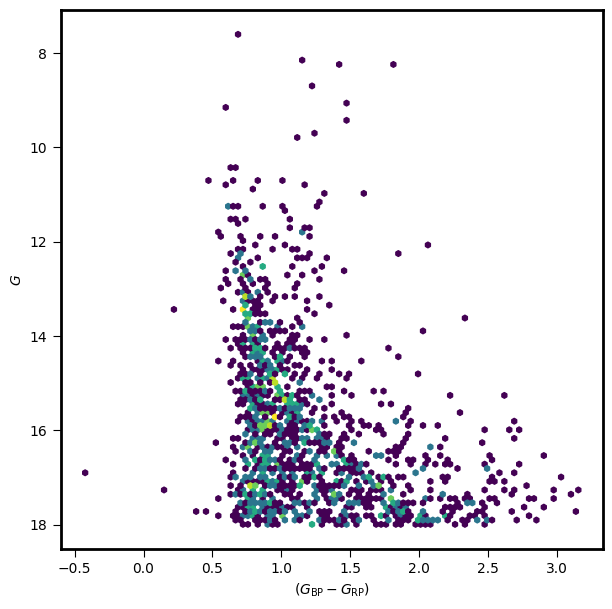

In [ ]:
# Your plotting code here  (1)  HR diagram using absolute magnitude and colour

bp_rp = m67_cone['phot_bp_mean_mag']-m67_cone['phot_rp_mean_mag']
gmag = m67_cone['phot_g_mean_mag']

fig, axhrd = plt.subplots(1, 1, figsize=(7, 7))

axhrd.hexbin(bp_rp, gmag, bins='log', mincnt=1)
axhrd.set_xlabel(r'$(G_\mathrm{BP}-G_\mathrm{RP})$')
axhrd.set_ylabel(r'$G$')
axhrd.invert_yaxis()

plt.show()

### Exercise 3

Now plot a proper CMD by using information from the parallaxes.
Which parts of the diagram can you identify?

<ipython-input-16-20dcd7522fe5>:3: RuntimeWarning: invalid value encountered in log10
  abs_gmag = m67_cone['phot_g_mean_mag']+5*np.log10(m67_cone['parallax'])-10


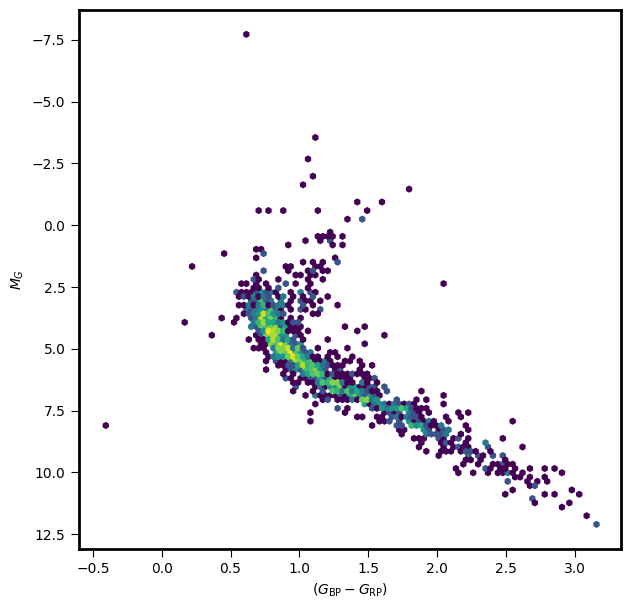

In [ ]:
# Your plotting code here

abs_gmag = m67_cone['phot_g_mean_mag']+5*np.log10(m67_cone['parallax'])-10

fig, axhrd = plt.subplots(1, 1, figsize=(7, 7))
axhrd.hexbin(bp_rp, abs_gmag, bins='log', mincnt=1)
axhrd.set_xlabel(r'$(G_\mathrm{BP}-G_\mathrm{RP})$')
axhrd.set_ylabel(r'$M_G$')
axhrd.invert_yaxis()

plt.show()

As we have performed a cone search, we have recovered all sources in the direction of the cluster even if they are not part of the cluster.   We need to find a way to identify the cluster members.    
You can start by plotting different parameters such as the distribution of sources on the sky (ra, dec).  Does this allow you to distinguish the cluster members?

Do you have any other ideas for identify

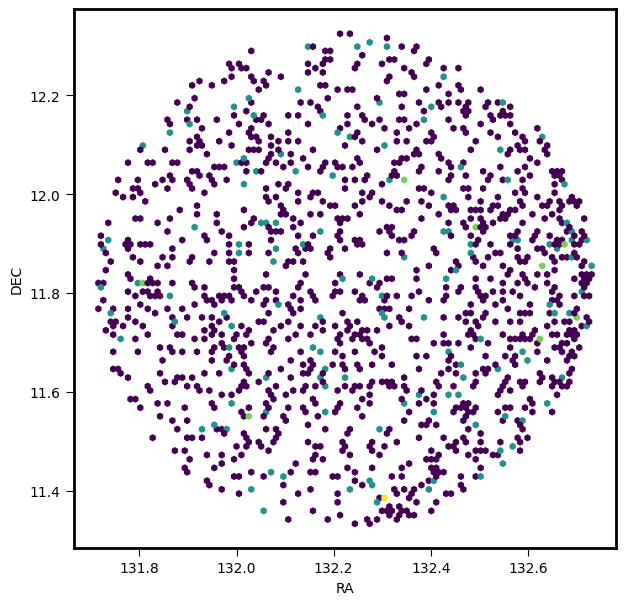

In [ ]:
# Your plotting code here

fig, axhrd = plt.subplots(1, 1, figsize=(7, 7))

axhrd.hexbin(m67_cone['ra'], m67_cone['dec'], bins='log', mincnt=1)
axhrd.set_xlabel(r'RA')
axhrd.set_ylabel(r'DEC')

plt.show()

### Exercise 4
Now plot the distribution of source in proper motion (pmra, pmdec).  Note that I will change the type of plotting diagram, but you can use whatever you prefer.

Members of clusters will move together through space, and therefore will have very similar proper motions.   You should try to identify a "clustering" of points in order to find the sources corresponding to M67.  

You can repeat the following plot several times, each time zooming in on the region of interest.  

The aim is to find the approximate central pmra and pmdec of M67, along with an estimate of the width of the "cluster".   Then we will use these numbers in the next query to retain only those sources.

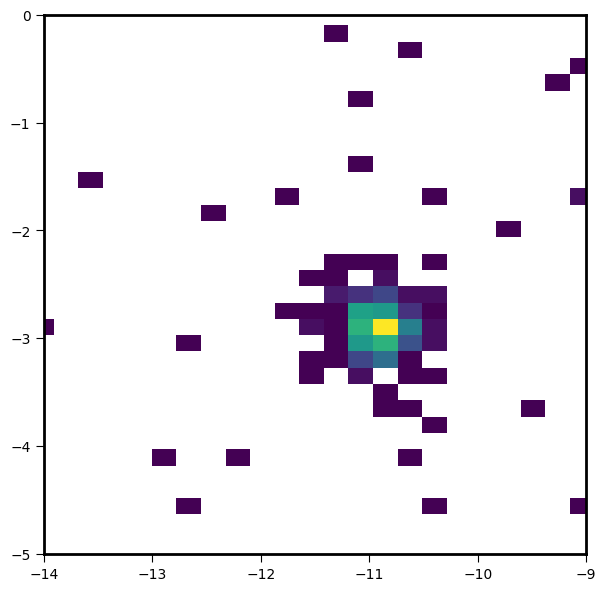

In [ ]:
# Your plotting code here
# no limits first
# then (-15,10)  (-20,20)
# then
#plt.xlim(-14,-9)
#plt.ylim(-5,0)
# also bins can increase to (1000,1000)
pmra = m67_cone['pmra']
pmdec = m67_cone['pmdec']


fig, ax = plt.subplots(1, 1, figsize=(7, 7))
plt.hist2d(pmra,pmdec,bins=(1000,1000),cmin=1)
# no limits first
# then (-15,10)  (-20,20)
# then(-14,-9)(-5,0)

#plt.xlim(-15,10)
#plt.ylim(-20,20)
plt.xlim(-14,-9)
plt.ylim(-5,0)

plt.show()

### Exercise 5
Now repeat the query that we used earlier for a cone search but this time you should add some constraints on proper motion (pmra, pmdec).   You need to replace values XX, YY and ZZ in the following query by the central pmra, pmdec that you found above and an approximage 'width' of the propermotion space to search within.
Relaunch the query and save the output into a table `m67`

`job = Gaia.launch_job_async("SELECT *, DISTANCE(215.3769982238633, +31.37026, l, b) AS ang_sep \
FROM gaiadr3.gaia_source \
WHERE DISTANCE(215.3769982238633, +31.37026, l, b) < 0.5 \
AND phot_g_mean_mag < 18 \
AND parallax IS NOT NULL \
AND abs(pmra - XX) < ZZ \
AND abs(pmdec - YY) < ZZ")`

(answer is -11, -3, and extent of the search is approx. half an arcmin (0.5))

In [ ]:
job = Gaia.launch_job_async("SELECT *, DISTANCE(215.3769982238633, +31.37026, l, b) AS ang_sep \
FROM gaiadr3.gaia_source \
WHERE DISTANCE(215.3769982238633, +31.37026, l, b) < 0.5 \
AND phot_g_mean_mag < 18 \
AND parallax IS NOT NULL \
AND abs(pmra + 11) < 0.5 \
AND abs(pmdec + 3) < 0.5")

m67=job.get_results()

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


### Exercise 6
Now plot the CMD of the cluster using (1) apparent G magnitude, and (2) absolute G magnitude.

What parts of the cluster can you identify?

Which diagram looks cleaner?  Why?

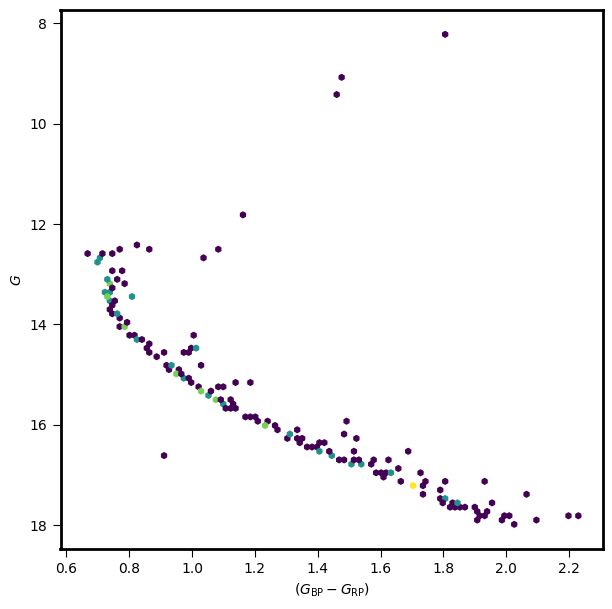

In [ ]:
bp_rp = m67['phot_bp_mean_mag']-m67['phot_rp_mean_mag']
gmag = m67['phot_g_mean_mag']

fig, axhrd = plt.subplots(1, 1, figsize=(7, 7))

axhrd.hexbin(bp_rp, gmag, bins='log', mincnt=1)
axhrd.set_xlabel(r'$(G_\mathrm{BP}-G_\mathrm{RP})$')
axhrd.set_ylabel(r'$G$')
axhrd.invert_yaxis()

plt.show()

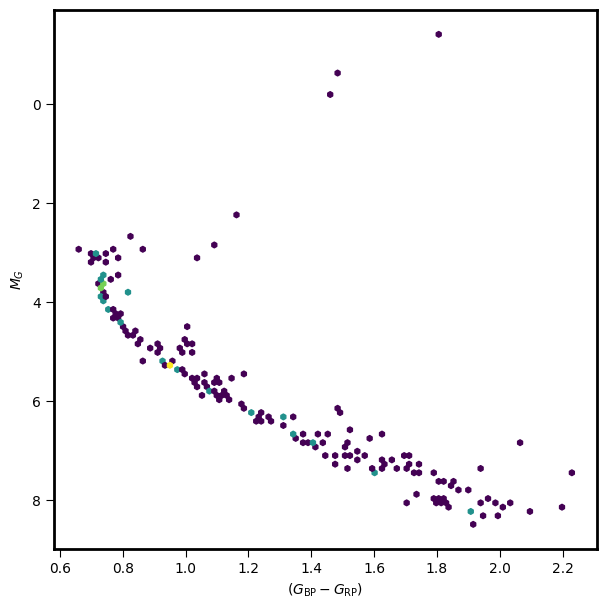

In [ ]:
abs_gmag = m67['phot_g_mean_mag']+5*np.log10(m67['parallax'])-10

fig, axhrd = plt.subplots(1, 1, figsize=(7, 7))

axhrd.hexbin(bp_rp, abs_gmag, bins='log', mincnt=1)
axhrd.set_xlabel(r'$(G_\mathrm{BP}-G_\mathrm{RP})$')
axhrd.set_ylabel(r'$M_G$')
axhrd.invert_yaxis()

plt.show()

### Parallax Zeropoint Correction
Let's apply the parallax zeropoint correction, see [Lindegren et al. 2020](https://ui.adsabs.harvard.edu/abs/2021A%26A...649A...4L/abstract).   
A python code was made available by the co-author Pau Ramos and it can be installed using pip.  See https://gitlab.com/icc-ub/public/gaiadr3_zeropoint

In [ ]:
pip install gaiadr3-zeropoint

In [ ]:
from zero_point import zpt
zpt.load_tables()

In [ ]:
phot_g_mean_mag = m67['phot_g_mean_mag']
nu_eff_used_in_astrometry = m67['nu_eff_used_in_astrometry']
pseudocolour=m67['pseudocolour']
ecl_lat=m67['ecl_lat']
astrometric_params_solved=m67['astrometric_params_solved']

parcor=zpt.get_zpt(phot_g_mean_mag, nu_eff_used_in_astrometry, pseudocolour, ecl_lat, astrometric_params_solved)
parallax_cor = m67['parallax'] - parcor


### Exercise 7

Now you can recalculate the absolute magnitudes of the individual cluster members and re-plot a HR diagram


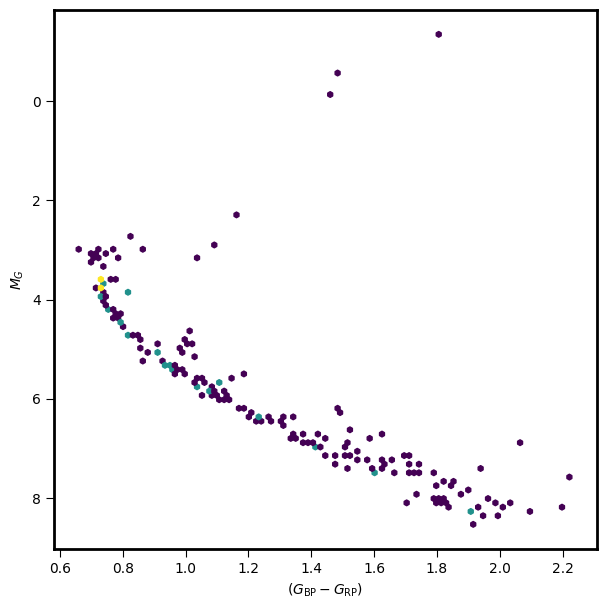

In [ ]:
abs_gmag_dist = m67['phot_g_mean_mag']+5*np.log10(parallax_cor)-10
fig, axhrd = plt.subplots(1, 1, figsize=(7, 7))

axhrd.hexbin(bp_rp, abs_gmag_dist, bins='log', mincnt=1)
axhrd.set_xlabel(r'$(G_\mathrm{BP}-G_\mathrm{RP})$')
axhrd.set_ylabel(r'$M_G$')
axhrd.invert_yaxis()

plt.show()

### Exercise 8

Because the cluster is at the same distance from the Sun (apart from a certain width), we can then assume one single value for the distance.  

(1) Calculate the mean distance to the cluster.

(2) Plot a new absolute magnitude diagram.

In [ ]:
wts = 1./(m67['parallax_error'])**2
meandistance_wtd = 1000./np.average(m67['parallax'],weights=wts)
meandistance_cor = 1000./np.mean(parallax_cor)
meandistance_cor_wtd = 1000./np.average(parallax_cor,weights=wts)
print(meandistance_wtd)
print(meandistance_cor)
print(meandistance_cor_wtd)

862.4929054115784
841.0941030991693
833.6584319038035


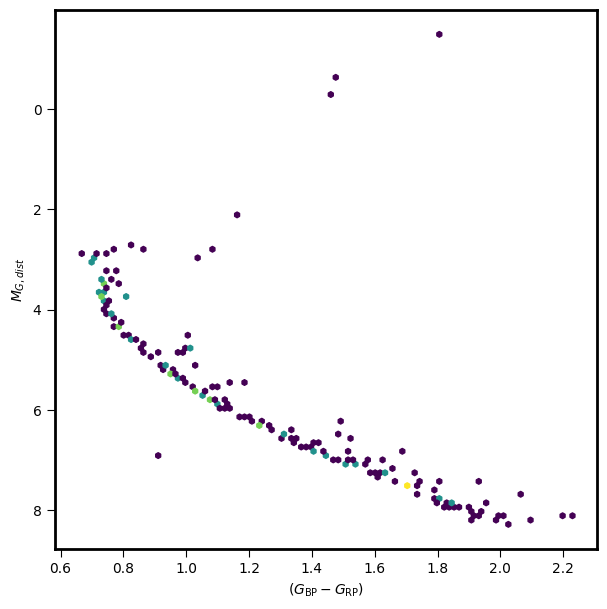

In [ ]:
absmag_dist = m67['phot_g_mean_mag'] + 5 - 5*np.log10(meandistance_cor_wtd)
fig, axhrd = plt.subplots(1, 1, figsize=(7, 7))

axhrd.hexbin(bp_rp, absmag_dist, bins='log', mincnt=1)
axhrd.set_xlabel(r'$(G_\mathrm{BP}-G_\mathrm{RP})$')
axhrd.set_ylabel(r'$M_{G,dist}$')
axhrd.invert_yaxis()

plt.show()


## __Retrieving isochrones from the literature__
In order to estimate an age for the cluster, we need to use stellar isochrones.   An isochrone is a theoretical model predicting the luminosity and effective temperature for a range of masses at fixed metallicity and age.   A stellar evolution track is similar, except it is at fixed mass and metallicity for a range of ages.

Let's retrieve isochrones from the literature.  

We will use the [Basti isochrones](http://basti-iac.oa-abruzzo.inaf.it/isocs.html), and a python package that enables us to easily extract the isochrones called [ezbasti](https://github.com/dinilbose/ezbasti).
This package was written by Dinil Palakkatharrapil based on a similar package called [ezpadova](https://github.com/mfouesneau/ezpadova) and [ezmist](https://github.com/mfouesneau/ezmist) developed by Morgan Fouesneau



In [ ]:
#  pip install git+https://github.com/dinilbose/ezbasti   ## this has already been done at the beginning

We need to define some parameters:
* the model number `model`
* the passbands we wish to work with `photometry`
* the metallicity `FeH`
* the age in years `age`

It is out of the scope of this tutorial to go into details on the models.  
For this exercise we will choose the `model='04'`, `photometry='GAIA-DR3'`, and we will fix the metallicity to solar `FeH=0.0`.  We will begin with an age of 100 million years `age=1e8`


-- more information --
* model=04: Solar-Scaled [alpha/Fe] = 0.0, Overshooting:Yes, Diffusion:Yes, Mass loss:n=0.3, He=0.247
* examples of available passbands: '2MASS', 'Euclid', 'GAIA-DR1', 'GAIA-DR2', ... (long list)
* see https://github.com/dinilbose/ezbasti

In [ ]:
import ezbasti


In [ ]:
data=ezbasti.get_one_isochrone(model='04',FeH=0.0,age=1e8,photometry='GAIA-DR3')

Interrogating http://basti-iac.oa-abruzzo.inaf.it/cgi-bin/isoc-get.py?alpha=P00&grid=P00O1D1E1Y247&metal=None&imetal=&imetalh=0.0&iage=100.0&bcsel=GAIA-DR3...
Request...Request...decompressing archive...
done.


In [ ]:
data.info

<Table length=2100>
   name    dtype 
--------- -------
M/Mo(ini) float64
M/Mo(fin) float64
log(L/Lo) float64
    logTe float64
        G float64
     G_BP float64
     G_RP float64
       Np float64
    [M/H] float64
        Z float64
        Y float64
 Age(Myr) float64

### Exercise 9
Plot a theoretical HR diagram (Lum vs Teff) using this isochrone.  Repeat for a CMD (G vs BP-RP).

Can you identify the different stages of the stellar lifetime on this track?

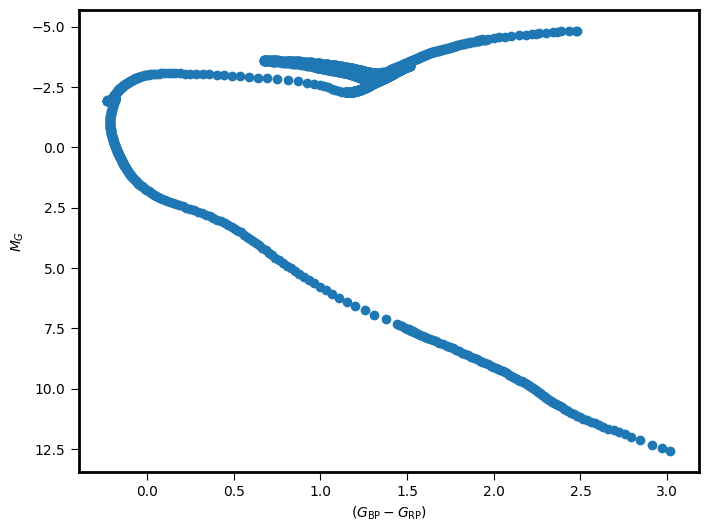

In [ ]:

plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.scatter(data['G_BP']-data['G_RP'],data['G'])
ax.set_xlabel(r'$(G_\mathrm{BP}-G_\mathrm{RP})$')
ax.set_ylabel(r'$M_G$')
ax.invert_yaxis()

plt.show()

### Exercise 10
Download 2 more isochrones with an age of 1e9 and 1e10 years.    

Plot the three isochrones on the same figure.

What happens to the shape of the isochrone as the stars get older?  Can you explain this?

In [ ]:
m1e9=ezbasti.get_one_isochrone(model='04',FeH=0.0,age=1e9,photometry='GAIA-DR3')

In [ ]:
m1e10=ezbasti.get_one_isochrone(model='04',FeH=0.0,age=1e10,photometry='GAIA-DR3')

Interrogating http://basti-iac.oa-abruzzo.inaf.it/cgi-bin/isoc-get.py?alpha=P00&grid=P00O1D1E1Y247&metal=None&imetal=&imetalh=0.0&iage=10000.0&bcsel=GAIA-DR3...
Request...Request...decompressing archive...
done.


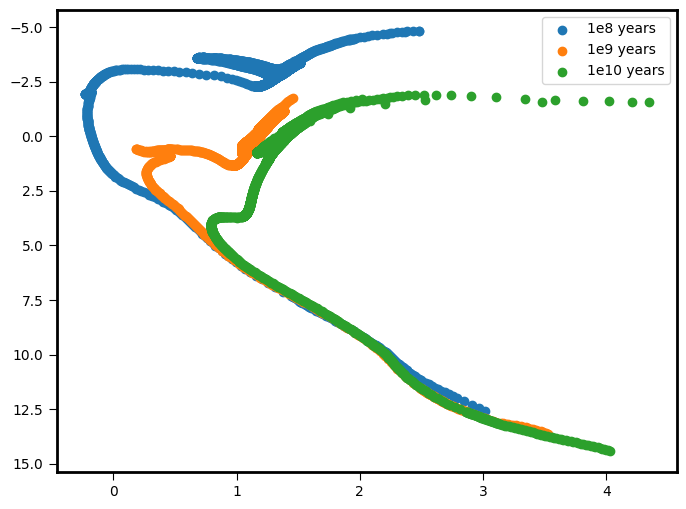

In [ ]:
# Do your diagram here

plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.scatter(data['G_BP']-data['G_RP'],data['G'],label='1e8 years')
ax.scatter(m1e9['G_BP']-m1e9['G_RP'],m1e9['G'],label='1e9 years')
ax.scatter(m1e10['G_BP']-m1e10['G_RP'],m1e10['G'],label='1e10 years')
ax.invert_yaxis()
ax.legend()

plt.show()

#__Determining the age of M67__

Now you should plot the isochrones and the data on the same plot in order to make a first guess at the age.

Download more isochrones as you need in order to improve the age determination.

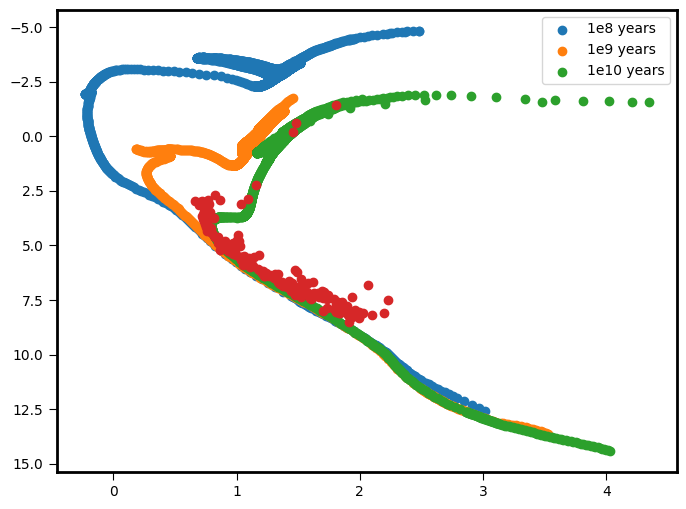

In [ ]:
#  Now insert your own code here to do this

plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.scatter(data['G_BP']-data['G_RP'],data['G'],label='1e8 years')
ax.scatter(m1e9['G_BP']-m1e9['G_RP'],m1e9['G'],label='1e9 years')
ax.scatter(m1e10['G_BP']-m1e10['G_RP'],m1e10['G'],label='1e10 years')
ax.scatter(bp_rp, abs_gmag)
ax.invert_yaxis()
ax.legend()

plt.show()

## __Follow up work__

1. Repeat the above exercise but now for the Pleiades cluster
2. Repeat the above exercise on the age, but now using different models from basti (different model number) or from padova (different models).   See [ezpadova](https://github.com/mfouesneau/ezpadova) package for help.


# END OF EXERCISE

In [ ]:
## Let's write one of the tables to save.  It can be found on the left panel
## if you click the folder icon.  Then you can download it.

#gold.write('gold.vot',format='votable')
data.write('model04_1e8.vot',format='votable')
m1e9.write('model04_1e9.vot',format='votable')
m1e10.write('model04_1e10.vot',format='votable')

## if you have issues connecting to the internet, then instead of the above queries you
## load the data directly

In [ ]:
## this is how you read in a vot table

mod1e10 = Table.read('model04_1e10.vot')
mod1e9 = Table.read('model04_1e9.vot')
mod1e8 = Table.read('model04_1e8.vot')


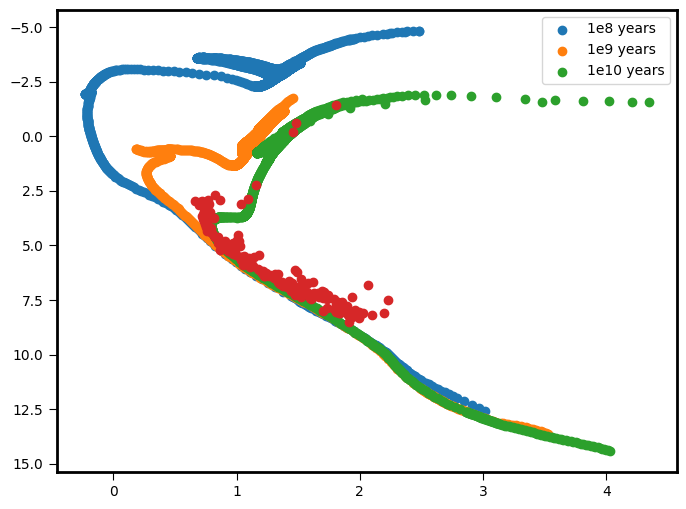

In [ ]:
plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.scatter(mod1e8['G_BP']-mod1e8['G_RP'],mod1e8['G'],label='1e8 years')
ax.scatter(mod1e9['G_BP']-mod1e9['G_RP'],mod1e9['G'],label='1e9 years')
ax.scatter(mod1e10['G_BP']-mod1e10['G_RP'],mod1e10['G'],label='1e10 years')
ax.scatter(bp_rp, abs_gmag)
ax.invert_yaxis()
ax.legend()

plt.show()